In [2]:
import pandas as pd

In [3]:
log_data_frame = pd.read_csv('dataset/system_logs.csv')
log_data_frame

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


#### Display all uniques value of source of log messages

In [4]:
log_data_frame.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

#### Displaying all unique labels of log message

In [5]:
log_data_frame.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

### Clustering log messages using DBSCAN and Sentence Transformers (word embedding techniques).



In [6]:
!pip install sentence-transformers scikit-learn

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

We are using the 'all-MiniLM-L6-v2' model which is good for semantic similarity tasks and clustering

In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2')
log_messages = log_data_frame['log_message'].tolist()
embeddings = model.encode(log_messages)

In [9]:
embeddings[:2]

array([[-1.02939673e-01,  3.35458741e-02, -2.20260676e-02,
         1.55104266e-03, -9.86922532e-03, -1.78956285e-01,
        -6.34410158e-02, -6.01762086e-02,  2.81108543e-02,
         5.99619895e-02, -1.72618385e-02,  1.43369357e-03,
        -1.49560049e-01,  3.15287942e-03, -5.66030405e-02,
         2.71685142e-02, -1.49890827e-02, -3.54037359e-02,
        -3.62936184e-02, -1.45410867e-02, -5.61493495e-03,
         8.75538886e-02,  4.55120392e-02,  2.50963718e-02,
         1.00187194e-02,  1.24266790e-02, -1.39923587e-01,
         7.68696144e-02,  3.14095393e-02, -4.15245071e-03,
         4.36902530e-02,  1.71249788e-02, -8.00950751e-02,
         5.74005730e-02,  1.89092103e-02,  8.55261907e-02,
         3.96399423e-02, -1.34371817e-01, -1.44361309e-03,
         3.06702894e-03,  1.76854089e-01,  4.44887718e-03,
        -1.69274695e-02,  2.24266443e-02, -4.35050502e-02,
         6.09023077e-03, -9.98169743e-03, -6.23972639e-02,
         1.07372375e-02, -6.04898110e-03, -7.14660957e-0

In [10]:
#scaled_embeddings = StandardScaler().fit_transform(embeddings)
dbscan = DBSCAN(eps=0.2, min_samples=1, metric='cosine')
clusters = dbscan.fit_predict(embeddings)
log_data_frame['cluster'] = clusters
log_data_frame

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0
...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1


In [11]:
cluster_counts = log_data_frame.cluster.value_counts()
large_clusters = cluster_counts[cluster_counts > 10].index
print(large_clusters)
for cluster in large_clusters:
    print(f'cluster {cluster}:')
    print(log_data_frame[log_data_frame.cluster == cluster]['log_message'].head(5).to_string(index=False))
    print()

Index([ 0,  5, 11, 13,  7,  8, 21,  3,  4, 17, 32,  6, 16, 20,  9,  1, 10, 34,
       14, 53, 52, 18, 25, 42, 59, 26],
      dtype='int64', name='cluster')
cluster 0:
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...

cluster 5:
nova.compute.claims [req-a07ac654-8e81-416d-bfb...
nova.compute.claims [req-d6986b54-3735-4a42-907...
nova.compute.claims [req-72b4858f-049e-49e1-b31...
nova.compute.claims [req-5c8f52bd-8e3c-41f0-95a...
nova.compute.claims [req-d38f479d-9bb9-4276-968...

cluster 11:
User User685 logged out.
 User User395 logged in.
 User User225 logged in.
User User494 logged out.
 User User900 logged in.

cluster 13:
Backup started at 2025-05-14 07:06:55.
Backup started at 2025-02-15 20:00:19.
  Backup ended at 2025-08-08 13:06:23.
Backup started at 2025-11-14 08:27:43.
Back

### classify common log message by regular expression

In [12]:
import re
def find_pattern_by_regex(log_message):
    regex_patterns = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message):
            return label
    return None

In [13]:
find_pattern_by_regex("User User123 logged in.")


'User Action'

In [14]:
# Apply regex classification
log_data_frame['regex_label'] = log_data_frame['log_message'].apply(lambda x: find_pattern_by_regex(x))
log_data_frame[log_data_frame['regex_label'].notnull()]

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
7,10/11/2025 8:44,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,regex,4,System Notification
14,1/4/2025 1:43,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,regex,4,System Notification
15,5/1/2025 9:41,ModernCRM,Backup completed successfully.,System Notification,regex,8,System Notification
18,2/22/2025 17:49,ModernCRM,Account with ID 5351 created by User634.,User Action,regex,9,User Action
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,regex,11,User Action
...,...,...,...,...,...,...,...
2376,6/27/2025 8:47,ModernCRM,System updated to version 2.0.5.,System Notification,regex,21,System Notification
2381,9/5/2025 6:39,ThirdPartyAPI,Disk cleanup completed successfully.,System Notification,regex,32,System Notification
2394,4/3/2025 13:13,ModernHR,Disk cleanup completed successfully.,System Notification,regex,32,System Notification
2395,5/2/2025 14:29,ThirdPartyAPI,Backup ended at 2025-05-06 11:23:16.,System Notification,regex,13,System Notification


In [15]:
log_data_frame

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


### Classification Using Embeddings unidentified pattern

In [16]:
non_regex_log_df = log_data_frame[log_data_frame['regex_label'].isnull()].copy()
non_regex_log_df

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [17]:
df_source_leg_crm = non_regex_log_df[non_regex_log_df.source=="LegacyCRM"]
df_source_leg_crm

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
60,2025-10-06 16:55:23,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,llm,24,None
255,2025-05-03 16:55:35,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,llm,48,None
377,2025-06-24 12:16:29,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,llm,62,None
1325,2025-04-17 07:33:44,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,llm,105,None
1734,2025-04-30 07:47:30,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,llm,118,None
1826,2025-01-23 10:33:36,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,llm,122,None
2217,2025-05-12 09:46:54,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,llm,133,None


In [18]:
non_leg_crm_df = non_regex_log_df[non_regex_log_df.source!="LegacyCRM"]
non_leg_crm_df

,timestamp,source,log_message,target_label,complexity,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,0,None
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,7,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,0,None
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1,None


In [19]:
non_leg_crm_df.shape

(1903, 7)

In [20]:
print(non_regex_log_df['target_label'].value_counts()[non_regex_log_df['target_label'].value_counts() <= 5])

target_label
Workflow Error         4
Deprecation Warning    3
Name: count, dtype: int64


In [21]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight embedding model
embeddings_filtered = model.encode(non_leg_crm_df['log_message'].tolist())
embeddings_filtered[:2]

array([[-1.02939673e-01,  3.35458741e-02, -2.20260676e-02,
         1.55104266e-03, -9.86922532e-03, -1.78956285e-01,
        -6.34410158e-02, -6.01762086e-02,  2.81108543e-02,
         5.99619895e-02, -1.72618385e-02,  1.43369357e-03,
        -1.49560049e-01,  3.15287942e-03, -5.66030405e-02,
         2.71685142e-02, -1.49890827e-02, -3.54037359e-02,
        -3.62936184e-02, -1.45410867e-02, -5.61493495e-03,
         8.75538886e-02,  4.55120392e-02,  2.50963718e-02,
         1.00187194e-02,  1.24266790e-02, -1.39923587e-01,
         7.68696144e-02,  3.14095393e-02, -4.15245071e-03,
         4.36902530e-02,  1.71249788e-02, -8.00950751e-02,
         5.74005730e-02,  1.89092103e-02,  8.55261907e-02,
         3.96399423e-02, -1.34371817e-01, -1.44361309e-03,
         3.06702894e-03,  1.76854089e-01,  4.44887718e-03,
        -1.69274695e-02,  2.24266443e-02, -4.35050502e-02,
         6.09023077e-03, -9.98169743e-03, -6.23972639e-02,
         1.07372375e-02, -6.04898110e-03, -7.14660957e-0

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Step 1: Prepare input and labels
X = embeddings_filtered                      #feature vectors from SentenceTransformer
y = non_leg_crm_df['target_label'].values   # True class labels

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Model
trained_legacy_classification = LogisticRegression(max_iter=1000)
trained_legacy_classification.fit(X_train, y_train)

# Step 4: Predict
y_pred = trained_legacy_classification.predict(X_test)

# Step 5: Evaluate
report = classification_report(y_test, y_pred)
print(report)


                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



In [48]:
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Overall Accuracy: 0.99


<Figure size 800x400 with 0 Axes>

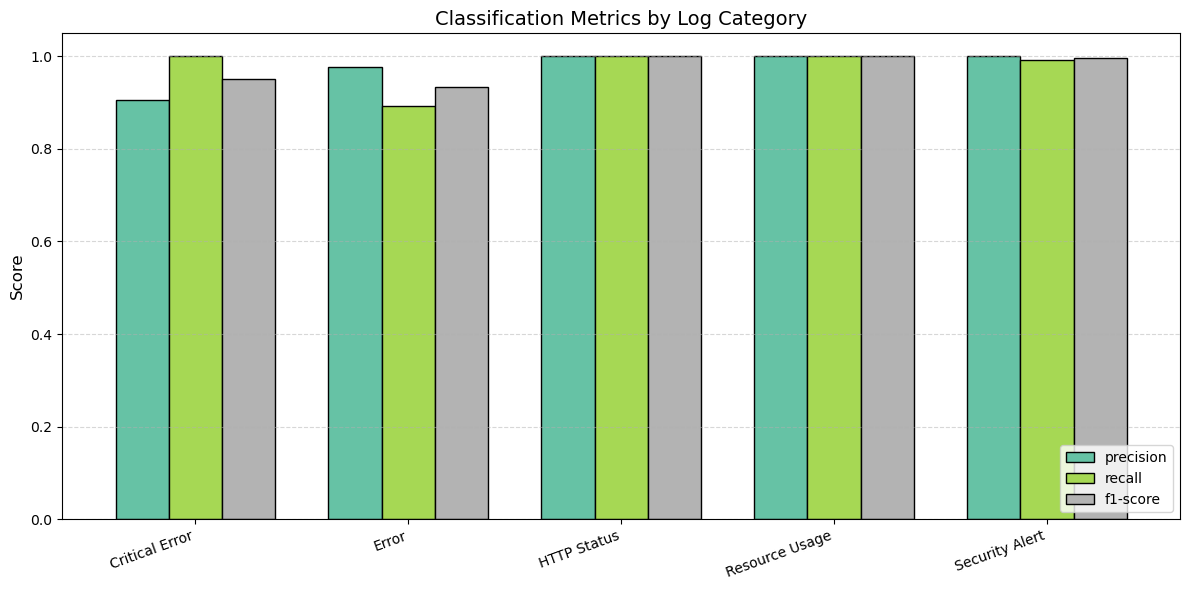

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Assume y_test and y_pred are already defined
report_dict = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report_dict).transpose()

# Filter only actual class labels
labels = [label for label in df.index if label not in ['accuracy', 'macro avg', 'weighted avg']]
df_filtered = df.loc[labels]

# Plot grouped bar chart
plt.figure(figsize=(8, 4))  # Wider figure to avoid overlapping
df_filtered[['precision', 'recall', 'f1-score']].plot(
    kind='bar',
    colormap='Set2',
    figsize=(12, 6),
    width=0.75,
    edgecolor='black'
)

plt.title('Classification Metrics by Log Category', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=20, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()  # Automatically adjust for better spacing
plt.savefig("classification_metrics_cleaned.png")
plt.show()


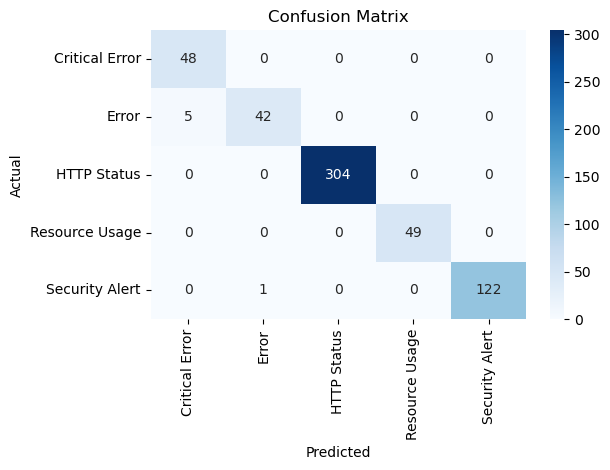

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=trained_legacy_classification.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=trained_legacy_classification.classes_,
            yticklabels=trained_legacy_classification.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


In [23]:
import joblib
joblib.dump(trained_legacy_classification, 'models/log_classifier.joblib')

['models/log_classifier.joblib']